In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
d = pd.read_csv('~/desktop/03_10.txt', sep=' ')


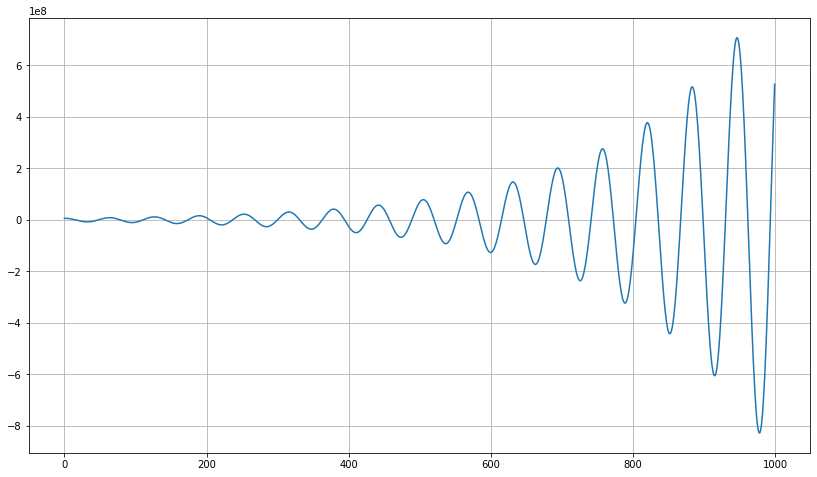

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

t = np.linspace(0, len(d), len(d))
plt.plot(t[:int(0.1*len(t))], d.x[:int(0.1*len(t))])

plt.grid(True)
plt.show()